# Financial Modelling for bankruptcy

According to my knowledge the Financial Models which are made are more interpretable because investors and financial Instritutions want to know what is happening with the data
I will try to make as much sense as possible of the data which is given to use using Statistical Analysis(Done [here](#ref3))

# WorkFlow

![Financial_dataset_model_building.png](https://i.ibb.co/G5vnm4Y/Financial-dataset-model-building.png)

# Data Ingestion

In [1]:
import pandas as pd
import numpy as np

In [2]:
path='data.csv'

In [3]:
df = pd.read_csv(path)

In [4]:
pd.Series(df.columns)

0                                             Bankrupt?
1      ROA(C) before interest and depreciation befor...
2                ROA(A) before interest and % after tax
3      ROA(B) before interest and depreciation after...
4                                Operating Gross Margin
                            ...                        
91                                  Liability to Equity
92                   Degree of Financial Leverage (DFL)
93     Interest Coverage Ratio (Interest expense to ...
94                                      Net Income Flag
95                                  Equity to Liability
Length: 96, dtype: object

In [5]:
df['Bankrupt?']

0       1
1       1
2       1
3       1
4       1
       ..
6814    0
6815    0
6816    0
6817    0
6818    0
Name: Bankrupt?, Length: 6819, dtype: int64

In [6]:
import plotly.express as px

# Create a histogram
fig = px.histogram(df, x='Bankrupt?', title='Distribution of bankrupt Column')

# Show the plot
fig.show()


### 6599 non-bankrupt and 220 bankrupt companies in our dataset which is quiet bad, To fix this we could either Oversample or undersample which both have 

In [8]:
df = pd.read_csv(path)

In [9]:
from sklearn.model_selection import train_test_split

# Features and label
X = df.drop('Bankrupt?', axis=1)
y = df['Bankrupt?']


# Split the data into training and testing sets+
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,random_state=42)

# Train Test Split

In [132]:
X_test

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
1244,0.503242,0.556149,0.552278,0.609399,0.609399,0.999043,0.797445,0.809349,0.303466,0.781609,...,0.805667,0.000830,0.623746,0.609399,0.841004,0.282359,0.027273,0.566736,1,0.022839
6303,0.485984,0.547754,0.530649,0.598812,0.598812,0.999002,0.797424,0.809331,0.303516,0.781591,...,0.803448,0.001949,0.623652,0.598810,0.840585,0.278525,0.027098,0.566292,1,0.035415
4712,0.554380,0.618513,0.609562,0.607857,0.607886,0.999043,0.797758,0.809638,0.304012,0.781922,...,0.839238,0.002042,0.623843,0.607852,0.843206,0.278607,0.026816,0.565273,1,0.034892
3273,0.663920,0.692324,0.709246,0.630097,0.630097,0.999314,0.797808,0.809651,0.303533,0.781935,...,0.879037,0.001139,0.624215,0.630092,0.844936,0.276559,0.026805,0.565222,1,0.061798
6430,0.450641,0.509976,0.495423,0.650492,0.650226,0.998738,0.797212,0.809081,0.303697,0.781240,...,0.782600,0.000845,0.623938,0.650488,0.839382,0.275173,0.026709,0.564734,1,0.207130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4163,0.485010,0.571849,0.533166,0.596009,0.596016,0.998993,0.797445,0.809361,0.303570,0.781590,...,0.817094,0.128326,0.624345,0.596005,0.841934,0.280973,0.026812,0.565254,1,0.025617
635,0.482328,0.539304,0.533915,0.601508,0.601594,0.998971,0.797374,0.809312,0.303494,0.781570,...,0.796868,0.001333,0.623546,0.601509,0.840141,0.283866,0.022002,0.571624,1,0.020771
6086,0.522352,0.580844,0.563895,0.599101,0.599101,0.999025,0.797482,0.809378,0.303570,0.781642,...,0.824578,0.002461,0.624393,0.599101,0.842427,0.280082,0.026797,0.565185,1,0.028154
2308,0.480330,0.547372,0.530917,0.596672,0.596600,0.998990,0.797422,0.809339,0.303536,0.781598,...,0.804941,0.007575,0.623754,0.596672,0.841049,0.284223,0.026808,0.565239,1,0.020377


# Preprocessing

In [11]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

class OutlierCapper(BaseEstimator, TransformerMixin):
    def __init__(self, lower_percentile=1, upper_percentile=99):
        self.lower_percentile = lower_percentile
        self.upper_percentile = upper_percentile

    def fit(self, X, y=None):
        self.lower_bounds = np.percentile(X, self.lower_percentile, axis=0)
        self.upper_bounds = np.percentile(X, self.upper_percentile, axis=0)
        return self

    def transform(self, X):
        return np.clip(X, self.lower_bounds, self.upper_bounds)

class LogTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return np.log1p(X)

# Initialize the VarianceThreshold object with a threshold of 0
constant_filter = VarianceThreshold(threshold=0)
scaler = StandardScaler()
pca = PCA(n_components=0.95)

# Define the preprocessing pipeline without the PCA step for feature name extraction
preprocessing_pipeline_no_pca = Pipeline(steps=[
    ('outlier_capper', OutlierCapper()),
    ('constant_filter', constant_filter),
    ('log_transform', LogTransformer()),
    ('scaler', scaler)
])

# Fit the pipeline on the training data
preprocessing_pipeline_no_pca.fit(X_train)

# Get the feature names after the scaler step
X_train_processed_no_pca = preprocessing_pipeline_no_pca.transform(X_train) #This is the output without Applying PCA
X_test_processed_no_pca = preprocessing_pipeline_no_pca.transform(X_test)

# The feature names after the scaler step
feature_names_after_scaler = X_train.columns[constant_filter.get_support()]

# print(f'Feature names after scaler step: {feature_names_after_scaler}')



In [12]:
pd.Series(feature_names_after_scaler)

0      ROA(C) before interest and depreciation befor...
1                ROA(A) before interest and % after tax
2      ROA(B) before interest and depreciation after...
3                                Operating Gross Margin
4                           Realized Sales Gross Margin
                            ...                        
88                   Net Income to Stockholder's Equity
89                                  Liability to Equity
90                   Degree of Financial Leverage (DFL)
91     Interest Coverage Ratio (Interest expense to ...
92                                  Equity to Liability
Length: 93, dtype: object

# Using PCA on Preprocessing for feature Selection

In [13]:
# Combine steps into a full preprocessing pipeline including PCA
preprocessing_pipeline = Pipeline(steps=[
    ('outlier_capper', OutlierCapper()),
    ('constant_filter', constant_filter),
    ('log_transform', LogTransformer()),
    ('scaler', scaler),
    ('pca', pca)
])

# Fit the full preprocessing pipeline on the training data
preprocessing_pipeline.fit(X_train)

# Transform the training data
X_train_processed = preprocessing_pipeline.transform(X_train)
X_test_processed = preprocessing_pipeline.transform(X_test)
# Get the PCA components
pca_components = pca.components_

# Create a DataFrame for better readability
pca_df = pd.DataFrame(pca_components, columns=feature_names_after_scaler)


In [14]:
pca_df.head(10)

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Current Liability to Current Assets,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0,0.187721,0.191709,0.187931,0.124131,0.123660,0.142561,0.157452,0.156165,0.094972,0.155403,...,-0.124058,0.192585,-0.009747,0.033229,0.124131,0.179353,-0.120388,-0.021652,0.002298,0.089361
1,0.090342,0.101303,0.089905,-0.068111,-0.068820,0.094176,0.091973,0.092804,0.026403,0.093049,...,0.117221,0.090903,0.022718,-0.042125,-0.068110,0.088416,0.191440,0.031232,0.045204,-0.198613
2,-0.076618,-0.059412,-0.081067,0.010017,0.010638,-0.062511,-0.082960,-0.083626,-0.074846,-0.079927,...,-0.144172,-0.062282,-0.085578,0.027499,0.010016,-0.057327,0.055977,-0.037972,-0.040357,0.050752
3,0.027006,-0.005561,0.028073,0.161400,0.162109,0.049170,-0.003965,-0.005020,-0.099344,-0.000491,...,0.100845,-0.021562,0.007310,-0.037635,0.161399,-0.047794,0.157120,0.037301,0.019558,-0.052611
4,-0.015014,-0.046386,-0.027916,-0.137945,-0.137131,0.003169,-0.053291,-0.059966,-0.108811,-0.045468,...,0.032910,-0.042784,0.055979,0.037132,-0.137945,-0.067924,-0.010085,-0.061098,-0.070863,0.002542
5,0.031441,0.016380,0.027922,0.254005,0.254367,0.162926,0.092133,0.086919,-0.084534,0.101087,...,0.045106,0.023752,-0.134209,-0.058116,0.254006,0.002284,0.005909,0.013517,0.019736,-0.024975
6,0.008417,0.004588,0.009484,-0.134634,-0.134192,-0.001369,0.035667,0.038808,0.044083,0.035812,...,0.020818,0.007351,-0.115933,0.078633,-0.134634,0.027672,-0.137328,0.043944,0.046700,-0.041476
7,0.017311,0.006221,0.010133,-0.006801,-0.006895,-0.086137,-0.076556,-0.078644,0.003935,-0.075731,...,0.092452,-0.004151,-0.080265,0.012838,-0.006803,0.003174,-0.046402,-0.106117,-0.153365,-0.124446
8,0.035568,-0.023748,0.023396,0.130324,0.131018,-0.127395,-0.201758,-0.202109,-0.167348,-0.186058,...,0.079522,-0.043136,0.066069,-0.004915,0.130320,-0.031242,-0.042968,-0.168620,-0.189207,0.015703
9,0.040664,0.008567,0.031213,0.022001,0.021312,0.028239,0.005632,0.001287,-0.030788,0.006684,...,-0.131188,-0.001365,-0.054313,0.186641,0.022001,-0.016780,0.088862,-0.041917,-0.049894,-0.084336


In [15]:
no_pca_df = pd.DataFrame(X_train_processed_no_pca, columns=feature_names_after_scaler)

In [16]:
no_pca_df.head(10)

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Current Liability to Current Assets,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0,-0.180144,-0.117628,-0.137754,-0.809933,-0.810182,-0.111312,0.046819,0.050941,0.254791,0.056357,...,-0.241249,-0.036133,-0.295299,-0.100338,-0.810016,-0.039387,-0.817458,-0.187738,-0.113036,0.710363
1,0.550510,0.558854,0.375203,-0.744047,-0.755132,0.085616,0.077766,0.064293,-0.005245,0.070992,...,-0.243245,0.587217,-0.322958,0.282395,-0.744264,0.848842,0.565835,-0.159780,-0.023180,-0.662719
2,0.408201,0.495133,0.253069,-0.116081,-0.114528,0.452993,0.508269,0.420210,0.353849,0.371004,...,-0.740070,0.613793,-0.252235,0.523981,-0.116014,0.416415,-0.740636,-0.204427,-0.169750,0.406428
3,-0.622890,-0.343045,-0.564434,-1.076856,-1.077797,-0.173250,-0.104787,-0.083838,0.015983,-0.079665,...,0.042259,-0.297915,-0.222812,0.468512,-1.077074,-0.176720,0.820746,0.444935,1.059063,-0.708389
4,-2.111244,-1.987700,-2.230744,3.640468,3.636998,-6.373233,-6.003845,-5.923688,2.764215,-5.961541,...,-1.435135,-1.545196,-0.366698,0.243862,3.640384,-0.906660,-1.073076,-0.204596,-0.170338,4.929124
5,-0.983075,-0.717778,-0.864096,0.943977,0.920499,-0.213483,-0.523196,-0.452304,-0.860637,-0.459340,...,0.244178,-0.662460,-0.320793,-0.082618,0.943994,-0.469795,-0.620009,-0.283337,-0.474566,0.098015
6,-0.108229,0.086704,0.023446,3.640468,3.636998,0.812944,0.169432,0.242880,-1.012801,0.294388,...,-1.296429,0.181024,-0.367669,0.044087,3.640384,0.073531,-0.969884,-0.204596,-0.170338,1.977557
7,-0.215727,-0.036804,-0.103132,-0.623949,-0.623714,-0.165309,-0.034664,-0.001635,0.161038,0.009008,...,0.567926,-0.064777,-0.248105,-0.171500,-0.623662,0.154819,1.195686,0.170913,0.709229,-0.757742
8,2.696315,2.582085,2.612500,1.194322,1.199277,1.392012,1.036652,1.071901,-0.022051,1.110416,...,-1.156457,2.335561,-0.365239,0.100896,1.194381,1.896011,-0.839940,-0.204596,-0.170338,0.825430
9,-0.319183,-0.375539,-0.207127,2.320547,2.328427,-0.250011,-0.179221,-0.101363,-0.023820,-0.155856,...,2.400536,-0.349554,-0.327688,-0.099738,2.320390,-0.238987,1.964613,-1.259586,4.239145,-0.822118


In [17]:
no_pca_df_test=pd.DataFrame(X_test_processed_no_pca, columns=feature_names_after_scaler)

In [18]:
n_pcs = pca.components_.shape[0]

# Get the index of the most important feature on EACH component
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]

# Initial feature names after the scaler step
initial_feature_names = feature_names_after_scaler.copy()

# Get the names of the most important features
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# Get the explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Create a dictionary with PCA component, most important feature, and explained variance
dic = {'PC{}'.format(i): {'Most Important Feature': most_important_names[i], 'Explained Variance': explained_variance[i]} for i in range(n_pcs)}

# Build the dataframe
df = pd.DataFrame(dic).T



In [19]:
df.head(10) #pca explaining variance of each column

,Most Important Feature,Explained Variance
PC0,Net Income to Total Assets,0.21998
PC1,Current Liability to Assets,0.124414
PC2,Current Assets/Total Assets,0.080624
PC3,Cash Flow to Total Assets,0.045761
PC4,CFO to Assets,0.041055
PC5,Realized Sales Gross Margin,0.036021
PC6,Regular Net Profit Growth Rate,0.033163
PC7,Average Collection Days,0.028714
PC8,Total expense/Assets,0.025543
PC9,Equity to Long-term Liability,0.023759


In [20]:
# Get the number of components
n_components = pca.n_components_

# Create names for the components
component_names = [f'PC{i+1}' for i in range(n_components)]

# Convert X_train_processed to a DataFrame
X_train_processed_df = pd.DataFrame(X_train_processed, columns=component_names, index=X_train.index)

# Create a DataFrame showing the contribution of each original feature to each principal component
components_df = pd.DataFrame(pca.components_.T, columns=component_names, index=feature_names_after_scaler)

print("Shape of X_train_processed_df:", X_train_processed_df.shape)
# print(X_train_processed_df.head())
components_df.head(10)
#Pca Components for each columns

Shape of X_train_processed_df: (5455, 42)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42
ROA(C) before interest and depreciation before interest,0.187721,0.090342,-0.076618,0.027006,-0.015014,0.031441,0.008417,0.017311,0.035568,0.040664,...,-0.047249,0.035963,-0.040648,-0.003971,0.096277,0.003414,0.022498,0.031586,0.050210,0.048946
ROA(A) before interest and % after tax,0.191709,0.101303,-0.059412,-0.005561,-0.046386,0.016380,0.004588,0.006221,-0.023748,0.008567,...,-0.009245,-0.010263,-0.004667,0.011453,0.086385,0.112803,0.051404,0.037116,-0.028301,0.030140
ROA(B) before interest and depreciation after tax,0.187931,0.089905,-0.081067,0.028073,-0.027916,0.027922,0.009484,0.010133,0.023396,0.031213,...,-0.045124,0.046109,-0.020339,-0.006158,0.116478,0.055985,0.035724,0.023295,0.024844,0.057053
Operating Gross Margin,0.124131,-0.068111,0.010017,0.161400,-0.137945,0.254005,-0.134634,-0.006801,0.130324,0.022001,...,0.110391,0.024764,0.002479,-0.089692,0.006293,0.104640,0.085921,0.006388,-0.020088,0.046463
Realized Sales Gross Margin,0.123660,-0.068820,0.010638,0.162109,-0.137131,0.254367,-0.134192,-0.006895,0.131018,0.021312,...,0.110306,0.025370,0.002397,-0.091840,0.008634,0.104492,0.083942,0.005917,-0.021268,0.048561
Operating Profit Rate,0.142561,0.094176,-0.062511,0.049170,0.003169,0.162926,-0.001369,-0.086137,-0.127395,0.028239,...,-0.036806,0.000527,0.136488,-0.017222,-0.014048,-0.073206,-0.119084,-0.010808,-0.144404,-0.057252
Pre-tax net Interest Rate,0.157452,0.091973,-0.082960,-0.003965,-0.053291,0.092133,0.035667,-0.076556,-0.201758,0.005632,...,0.000998,0.001732,0.071576,-0.008155,-0.084878,-0.136150,-0.098208,0.022068,0.023760,-0.058814
After-tax net Interest Rate,0.156165,0.092804,-0.083626,-0.005020,-0.059966,0.086919,0.038808,-0.078644,-0.202109,0.001287,...,-0.000848,0.009453,0.077223,-0.008621,-0.068895,-0.099546,-0.088767,0.019171,0.020592,-0.048014
Non-industry income and expenditure/revenue,0.094972,0.026403,-0.074846,-0.099344,-0.108811,-0.084534,0.044083,0.003935,-0.167348,-0.030788,...,0.113165,-0.040352,-0.145715,0.016393,-0.151959,-0.068183,0.084748,-0.004321,0.284811,0.005812
Continuous interest rate (after tax),0.155403,0.093049,-0.079927,-0.000491,-0.045468,0.101087,0.035812,-0.075731,-0.186058,0.006684,...,-0.020801,0.026511,0.087408,0.012535,-0.057607,-0.084151,-0.107902,0.000914,0.015492,-0.045587


## Cumulative Variance Explained by pca

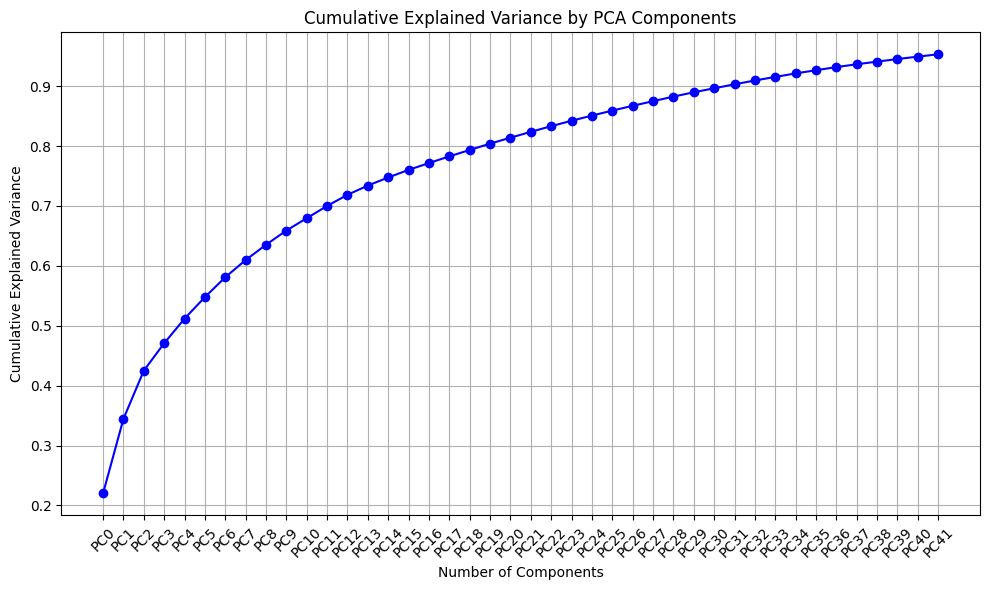

In [21]:
import matplotlib.pyplot as plt

# Calculate cumulative explained variance
cumulative_variance = df['Explained Variance'].cumsum()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance, marker='o', linestyle='-', color='b')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.xticks(range(0, len(df)), df.index,rotation=45)
plt.tight_layout()
plt.show()


# Here we can use the approach of Oversampling+Undersampling given by the Research Papers to verify which Sampling technique is best for our dataset  [1](#ref1) [2](#ref2)




Used X_train and y train without preprocessing because the relative difference between all the algorithms wouldn't change much even if we used preprocessed inputs

In [23]:
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler, EditedNearestNeighbours
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, fbeta_score


# Define the techniques to evaluate
oversampling_methods = [SMOTE(sampling_strategy=0.5), ADASYN(sampling_strategy=0.5)]
undersampling_methods = [RandomUnderSampler(sampling_strategy=0.8), EditedNearestNeighbours()]

# Define the model
model = RandomForestClassifier(random_state=42)

# Define the F2 scorer, F2 score is nothing but a variant of F1 score, Higher(2) F2 score weighs more on precision whereas lower(0 to 1) weighs more on recall. Here we are using beta as 2 so
# the overall impact on F2 score will be relatively more determined by precision.
f2_scorer = make_scorer(fbeta_score, beta=2)

# Evaluate each combination
results = []
for over in oversampling_methods:
    for under in undersampling_methods:
        steps = [('over', over), ('under', under)]
        pipeline = Pipeline(steps=steps)
        
        # Apply the pipeline to the training data
        X_temp_resampled, y_temp_resampled = pipeline.fit_resample(X_train, y_train)
        
        # Evaluate the model using cross-validation
        scores = cross_val_score(model, X_temp_resampled, y_temp_resampled, scoring=f2_scorer, cv=5)
        results.append({
            'oversampler': over.__class__.__name__,
            'undersampler': under.__class__.__name__,
            'mean_f2_score': scores.mean()
        })

# Convert results to a DataFrame for easy comparison
results_sample_df = pd.DataFrame(results)
results_sample_df

,oversampler,undersampler,mean_f2_score
0,SMOTE,RandomUnderSampler,0.974487
1,SMOTE,EditedNearestNeighbours,0.973713
2,ADASYN,RandomUnderSampler,0.948833
3,ADASYN,EditedNearestNeighbours,0.947499


### Best Technique would be SMOTE + RandomUnderSampling which we already applied

In [24]:
# Function to get feature names after each step
def get_feature_names_after_pipeline(pipeline, feature_names):
    for name, step in pipeline.named_steps.items():
        if hasattr(step, 'get_feature_names_out'):
            feature_names = step.get_feature_names_out(feature_names)
        elif hasattr(step, 'get_support'):
            feature_names = np.array(feature_names)[step.get_support()]
#         print(f'After {name}: {feature_names}')
    return feature_names

# Assuming original feature names are provided
original_feature_names = X_train.columns  

# Print feature names after each step in the preprocessing pipeline
final_feature_names = get_feature_names_after_pipeline(preprocessing_pipeline, original_feature_names)

In [25]:
print(f'Final feature names: {final_feature_names}')

Final feature names: ['pca0' 'pca1' 'pca2' 'pca3' 'pca4' 'pca5' 'pca6' 'pca7' 'pca8' 'pca9'
 'pca10' 'pca11' 'pca12' 'pca13' 'pca14' 'pca15' 'pca16' 'pca17' 'pca18'
 'pca19' 'pca20' 'pca21' 'pca22' 'pca23' 'pca24' 'pca25' 'pca26' 'pca27'
 'pca28' 'pca29' 'pca30' 'pca31' 'pca32' 'pca33' 'pca34' 'pca35' 'pca36'
 'pca37' 'pca38' 'pca39' 'pca40' 'pca41']


In [26]:
# Get the PCA components

pca_components = pca.components_

# # Create a DataFrame for better readability
# pca_df = pd.DataFrame(pca_components, columns=X_train.columns)
# print(pca_df)

In [27]:
pca_components.shape

(42, 93)

# Check for MultiColinearity, We can use either VIF,Correlation Matrix, Regularization
### Here we will be using ridge regularization to select best features and also remove multicolinearity

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
param_grid = {'alpha': [0.1, 1.0, 10.0, 100.0]}
grid_search = GridSearchCV(estimator=Ridge(), param_grid=param_grid, cv=5)
grid_search.fit(X_train_processed_no_pca, y_train)
best_alpha = grid_search.best_params_['alpha']


In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
param_grid = {'alpha': [0.1, 1.0, 10.0, 100.0]}
grid_search = GridSearchCV(estimator=Ridge(), param_grid=param_grid, cv=5)
grid_search.fit(X_train_processed_no_pca, y_train)
best_alpha = grid_search.best_params_['alpha']

def apply_ridge_regression(X, y, alpha=1.0):
    ridge_reg = Ridge(alpha=alpha)
    ridge_reg.fit(X, y)
    return ridge_reg.coef_
coefficients = apply_ridge_regression(X_train_processed_no_pca, y_train, alpha=best_alpha)  

# regularized_features=pd.DataFrame()

In [106]:
y_train

318     0
5796    0
4454    0
2225    0
3249    0
       ..
4688    0
1078    0
6687    0
2623    0
665     0
Name: Bankrupt?, Length: 5455, dtype: int64

In [121]:
# class FeatureSelector(BaseEstimator, TransformerMixin):
#     def __init__(self, alpha=100.0, threshold=0.1):
#         self.alpha = alpha
#         self.threshold = threshold
    
#     def fit(self, X, y):
#         self.ridge = Ridge(alpha=self.alpha)
#         self.ridge.fit(X, y)
#         self.coefficients = self.ridge.coef_
        
#         feature_names = X.columns
#         self.regularized_features = pd.DataFrame({
#             'Features': feature_names,
#             'Coef': self.coefficients
#         })
#         self.regularized_features = self.regularized_features.reindex(
#             self.regularized_features['Coef'].abs().sort_values(ascending=False).index
#         )
#         return self

#     def transform(self, X, y=None):
#         selected_features = self.select_features(self.regularized_features, self.threshold)
#         return X[selected_features['Features']]

#     def select_features(self, df, threshold):
#         return df[(df['Coef'] >= threshold) | (df['Coef'] <= -threshold)]

In [30]:
regularized_features=pd.DataFrame()

## We take the Middle Threshold here and select all the features lying inside this threshold

In [96]:
# Assuming X_preprocessed and coefficients are already defined
feature_names = no_pca_df.columns
# Create a DataFrame to store features and their coefficients
regularized_features = pd.DataFrame({
    'Features': feature_names,
    'Coef': coefficients
})

# Sort the DataFrame by coefficient values in descending order of absolute values
# but keep the original sign
regularized_features = regularized_features.reindex(
    regularized_features['Coef'].abs().sort_values(ascending=False).index
)
 

In [97]:
regularized_features

,Features,Coef
88,Net Income to Stockholder's Equity,-0.050933
1,ROA(A) before interest and % after tax,0.047037
35,Total debt/Total net worth,0.044311
59,Current Liability to Assets,0.033127
9,Continuous interest rate (after tax),-0.032074
...,...,...
34,Interest Expense Ratio,-0.000743
10,Operating Expense Rate,0.000721
27,Continuous Net Profit Growth Rate,-0.000666
80,Cash Flow to Liability,-0.000542


In [ ]:
# Function to select features based on a threshold, considering sign
def select_features(df, threshold):
    return df[(df['Coef'] >= threshold) | (df['Coef'] <= -threshold)]

# Select features with different thresholds
threshold_high = 0.02
threshold_medium = 0.01
threshold_low = 0.005



selected_high = select_features(regularized_features, threshold_high)
selected_medium = select_features(regularized_features, threshold_medium)
selected_low = select_features(regularized_features, threshold_low)

In [32]:
from IPython.display import display, Markdown

# Print results
display(Markdown('## Feature Coefficients Analysis'))
display(Markdown('Without Caring about the Negative and Positive Values, we just checked the absolute values, i.e., the features which have the most impact on the target.'))

display(Markdown('### Features with |coefficient| >= High Threshold'))
display(selected_high[['Features', 'Coef']])

display(Markdown('### Features with |coefficient| >= Medium Threshold'))
display(selected_medium[['Features', 'Coef']])

display(Markdown('### Features with |coefficient| >= Low Threshold'))
display(selected_low[['Features', 'Coef']])

# Get list of selected features (using medium threshold)
selected_features = selected_medium['Features'].tolist()

X_train_selected = no_pca_df[selected_features]
X_test_selected = no_pca_df_test[selected_features]


## Feature Coefficients Analysis

Without Caring about the Negative and Positive Values, we just checked the absolute values, i.e., the features which have the most impact on the target.

### Features with |coefficient| >= High Threshold

,Features,Coef
88,Net Income to Stockholder's Equity,-0.050933
1,ROA(A) before interest and % after tax,0.047037
35,Total debt/Total net worth,0.044311
59,Current Liability to Assets,0.033127
9,Continuous interest rate (after tax),-0.032074
69,Total expense/Assets,0.029045
43,Inventory and accounts receivable/Net value,-0.026908
6,Pre-tax net Interest Rate,0.026350
18,Persistent EPS in the Last Four Seasons,-0.021628
79,Cash Flow to Total Assets,0.021083


### Features with |coefficient| >= Medium Threshold

,Features,Coef
88,Net Income to Stockholder's Equity,-0.050933
1,ROA(A) before interest and % after tax,0.047037
35,Total debt/Total net worth,0.044311
59,Current Liability to Assets,0.033127
9,Continuous interest rate (after tax),-0.032074
69,Total expense/Assets,0.029045
43,Inventory and accounts receivable/Net value,-0.026908
6,Pre-tax net Interest Rate,0.026350
18,Persistent EPS in the Last Four Seasons,-0.021628
79,Cash Flow to Total Assets,0.021083


### Features with |coefficient| >= Low Threshold

,Features,Coef
88,Net Income to Stockholder's Equity,-0.050933
1,ROA(A) before interest and % after tax,0.047037
35,Total debt/Total net worth,0.044311
59,Current Liability to Assets,0.033127
9,Continuous interest rate (after tax),-0.032074
69,Total expense/Assets,0.029045
43,Inventory and accounts receivable/Net value,-0.026908
6,Pre-tax net Interest Rate,0.026350
18,Persistent EPS in the Last Four Seasons,-0.021628
79,Cash Flow to Total Assets,0.021083


# Custom Pipeline classes for preprocessing

In [95]:
regularized_features

,Features,Coef
88,Net Income to Stockholder's Equity,-0.050933
1,ROA(A) before interest and % after tax,0.047037
35,Total debt/Total net worth,0.044311
59,Current Liability to Assets,0.033127
9,Continuous interest rate (after tax),-0.032074
...,...,...
34,Interest Expense Ratio,-0.000743
10,Operating Expense Rate,0.000721
27,Continuous Net Profit Growth Rate,-0.000666
80,Cash Flow to Liability,-0.000542


In [100]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
import pandas as pd

class DataFrameVarianceThreshold(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=0):
        self.threshold=threshold
        self.variance_threshold = VarianceThreshold(threshold=self.threshold)
    
    def fit(self, X, y=None):
        self.variance_threshold.fit(X)
        return self
    
    def transform(self, X):
        X_filtered = self.variance_threshold.transform(X)
        return pd.DataFrame(X_filtered, columns=X.columns[self.variance_threshold.get_support()])
    
class DataFrameScaler(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.scaler = StandardScaler()
    
    def fit(self, X, y=None):
        self.scaler.fit(X)
        return self
    
    def transform(self, X):
        X_scaled = self.scaler.transform(X)
        return pd.DataFrame(X_scaled, columns=X.columns, index=X.index)
    
class DF_log_transform(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Ensure output is DataFrame with original columns
        return pd.DataFrame(np.log1p(X), columns=X.columns)


class FeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, alpha=100.0, threshold=0.01):
        self.alpha = alpha
        self.threshold = threshold
    
    def fit(self, X, y):
        self.ridge = Ridge(alpha=self.alpha)
        self.ridge.fit(X, y)
        self.coefficients = self.ridge.coef_
        
        feature_names = X.columns
        self.regularized_features = pd.DataFrame({
            'Features': feature_names,
            'Coef': self.coefficients
        })
        self.regularized_features = self.regularized_features.reindex(
            self.regularized_features['Coef'].abs().sort_values(ascending=False).index
        )
        return self

    def transform(self, X, y=None):
        selected_features = self.select_features(self.regularized_features, self.threshold)
        return X[selected_features['Features']]

    def select_features(self, df, threshold):
        return df[(df['Coef'] >= threshold) | (df['Coef'] <= -threshold)]
    

class OutlierCapper(BaseEstimator, TransformerMixin):
    def __init__(self, lower_percentile=1, upper_percentile=99):
        self.lower_percentile = lower_percentile
        self.upper_percentile = upper_percentile

    def fit(self, X, y=None):
        self.lower_bounds = np.percentile(X, self.lower_percentile, axis=0)
        self.upper_bounds = np.percentile(X, self.upper_percentile, axis=0)
        return self

    def transform(self, X):
        X_capped = np.clip(X, self.lower_bounds, self.upper_bounds)
        return pd.DataFrame(X_capped, columns=X.columns, index=X.index)


In [101]:
# Define the thresholds for regularization coeff
thresholds = {
    'high': 0.02,
    'medium': 0.01,
    'low': 0.005
}

In [103]:
threshold_medium

0.01

In [107]:
from sklearn.pipeline import Pipeline

# Define the preprocessing pipeline without the PCA step for feature name extraction
preprocessing_pipeline_final = Pipeline(steps=[
    ('outlier_capper', OutlierCapper()),
    ('constant_filter', DataFrameVarianceThreshold()),
    ('log_transform', DF_log_transform()),
    ('scaler', DataFrameScaler()),  # Use the custom DataFrameScaler
    ('feature_selector', FeatureSelector(threshold=thresholds['medium']))
])

# Fit the pipeline on the training data
preprocessing_pipeline_final.fit(X_train,y_train)






Pipeline(steps=[('outlier_capper', OutlierCapper()),
                ('constant_filter', DataFrameVarianceThreshold()),
                ('log_transform', DF_log_transform()),
                ('scaler', DataFrameScaler()),
                ('feature_selector', FeatureSelector(threshold=0.01))])

In [108]:
# # Transform the training and test data using the updated pipeline
X_train_Final = preprocessing_pipeline_final.transform(X_train)
X_test_Final = preprocessing_pipeline_final.transform(X_test)

In [37]:
X_train

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
318,0.493784,0.550153,0.544622,0.598524,0.598524,0.998980,0.797443,0.809355,0.303595,0.781616,...,0.806631,0.001637,0.623661,0.598521,0.840649,0.276281,0.026814,0.565265,1,0.070742
5796,0.534393,0.590765,0.573425,0.599302,0.599173,0.999023,0.797454,0.809359,0.303524,0.781621,...,0.827723,0.001079,0.624307,0.599298,0.843248,0.282615,0.026852,0.565433,1,0.022433
4454,0.526398,0.586895,0.566519,0.606740,0.606740,0.999103,0.797606,0.809470,0.303622,0.781718,...,0.828627,0.002505,0.624714,0.606739,0.841982,0.276632,0.026791,0.565159,1,0.059856
2225,0.469702,0.536851,0.521066,0.595375,0.595375,0.998967,0.797390,0.809313,0.303530,0.781572,...,0.797846,0.003100,0.624621,0.595370,0.840248,0.283786,0.027673,0.567450,1,0.020864
3249,0.391557,0.443197,0.432464,0.664495,0.664495,0.995856,0.794096,0.806216,0.304281,0.777918,...,0.756573,0.000198,0.624242,0.664491,0.838115,0.275114,0.026791,0.565158,1,0.233952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4688,0.550090,0.563890,0.593501,0.602221,0.602221,0.999046,0.797482,0.809400,0.303527,0.781665,...,0.811639,0.318807,0.623799,0.602217,0.841515,0.281613,0.026865,0.565486,1,0.024197
1078,0.481597,0.528129,0.530007,0.605933,0.605954,0.999021,0.797349,0.809262,0.303343,0.781612,...,0.791904,0.001990,0.623473,0.605932,0.839643,0.282249,0.025451,0.588994,1,0.023023
6687,0.622288,0.707697,0.689330,0.614293,0.603353,0.998882,0.799178,0.811001,0.306831,0.783383,...,0.875503,0.002238,0.624557,0.614294,0.844092,0.275407,0.026794,0.565172,1,0.143685
2623,0.586847,0.642172,0.623374,0.609774,0.609759,0.999064,0.797540,0.809426,0.303589,0.781686,...,0.856548,0.000987,0.623850,0.609770,0.843796,0.277000,0.026791,0.565159,1,0.051988


# Regularization + Resampling, we will only do this for training set as there is no need to synthesize test set 


In [38]:
from imblearn.combine import SMOTEENN

# Initialize SMOTEENN
smote_enn = SMOTEENN()

# Apply SMOTEENN to the processed training data
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train_Final, y_train)

# NOTE: Always resample after doing Train and test split otherwise it will cause data leakage, `You cannot create Synthetic Data points from an unknown value, can you?`
<a id="ref5"></a>

## Visualizing the Distribution of Data in each Feature

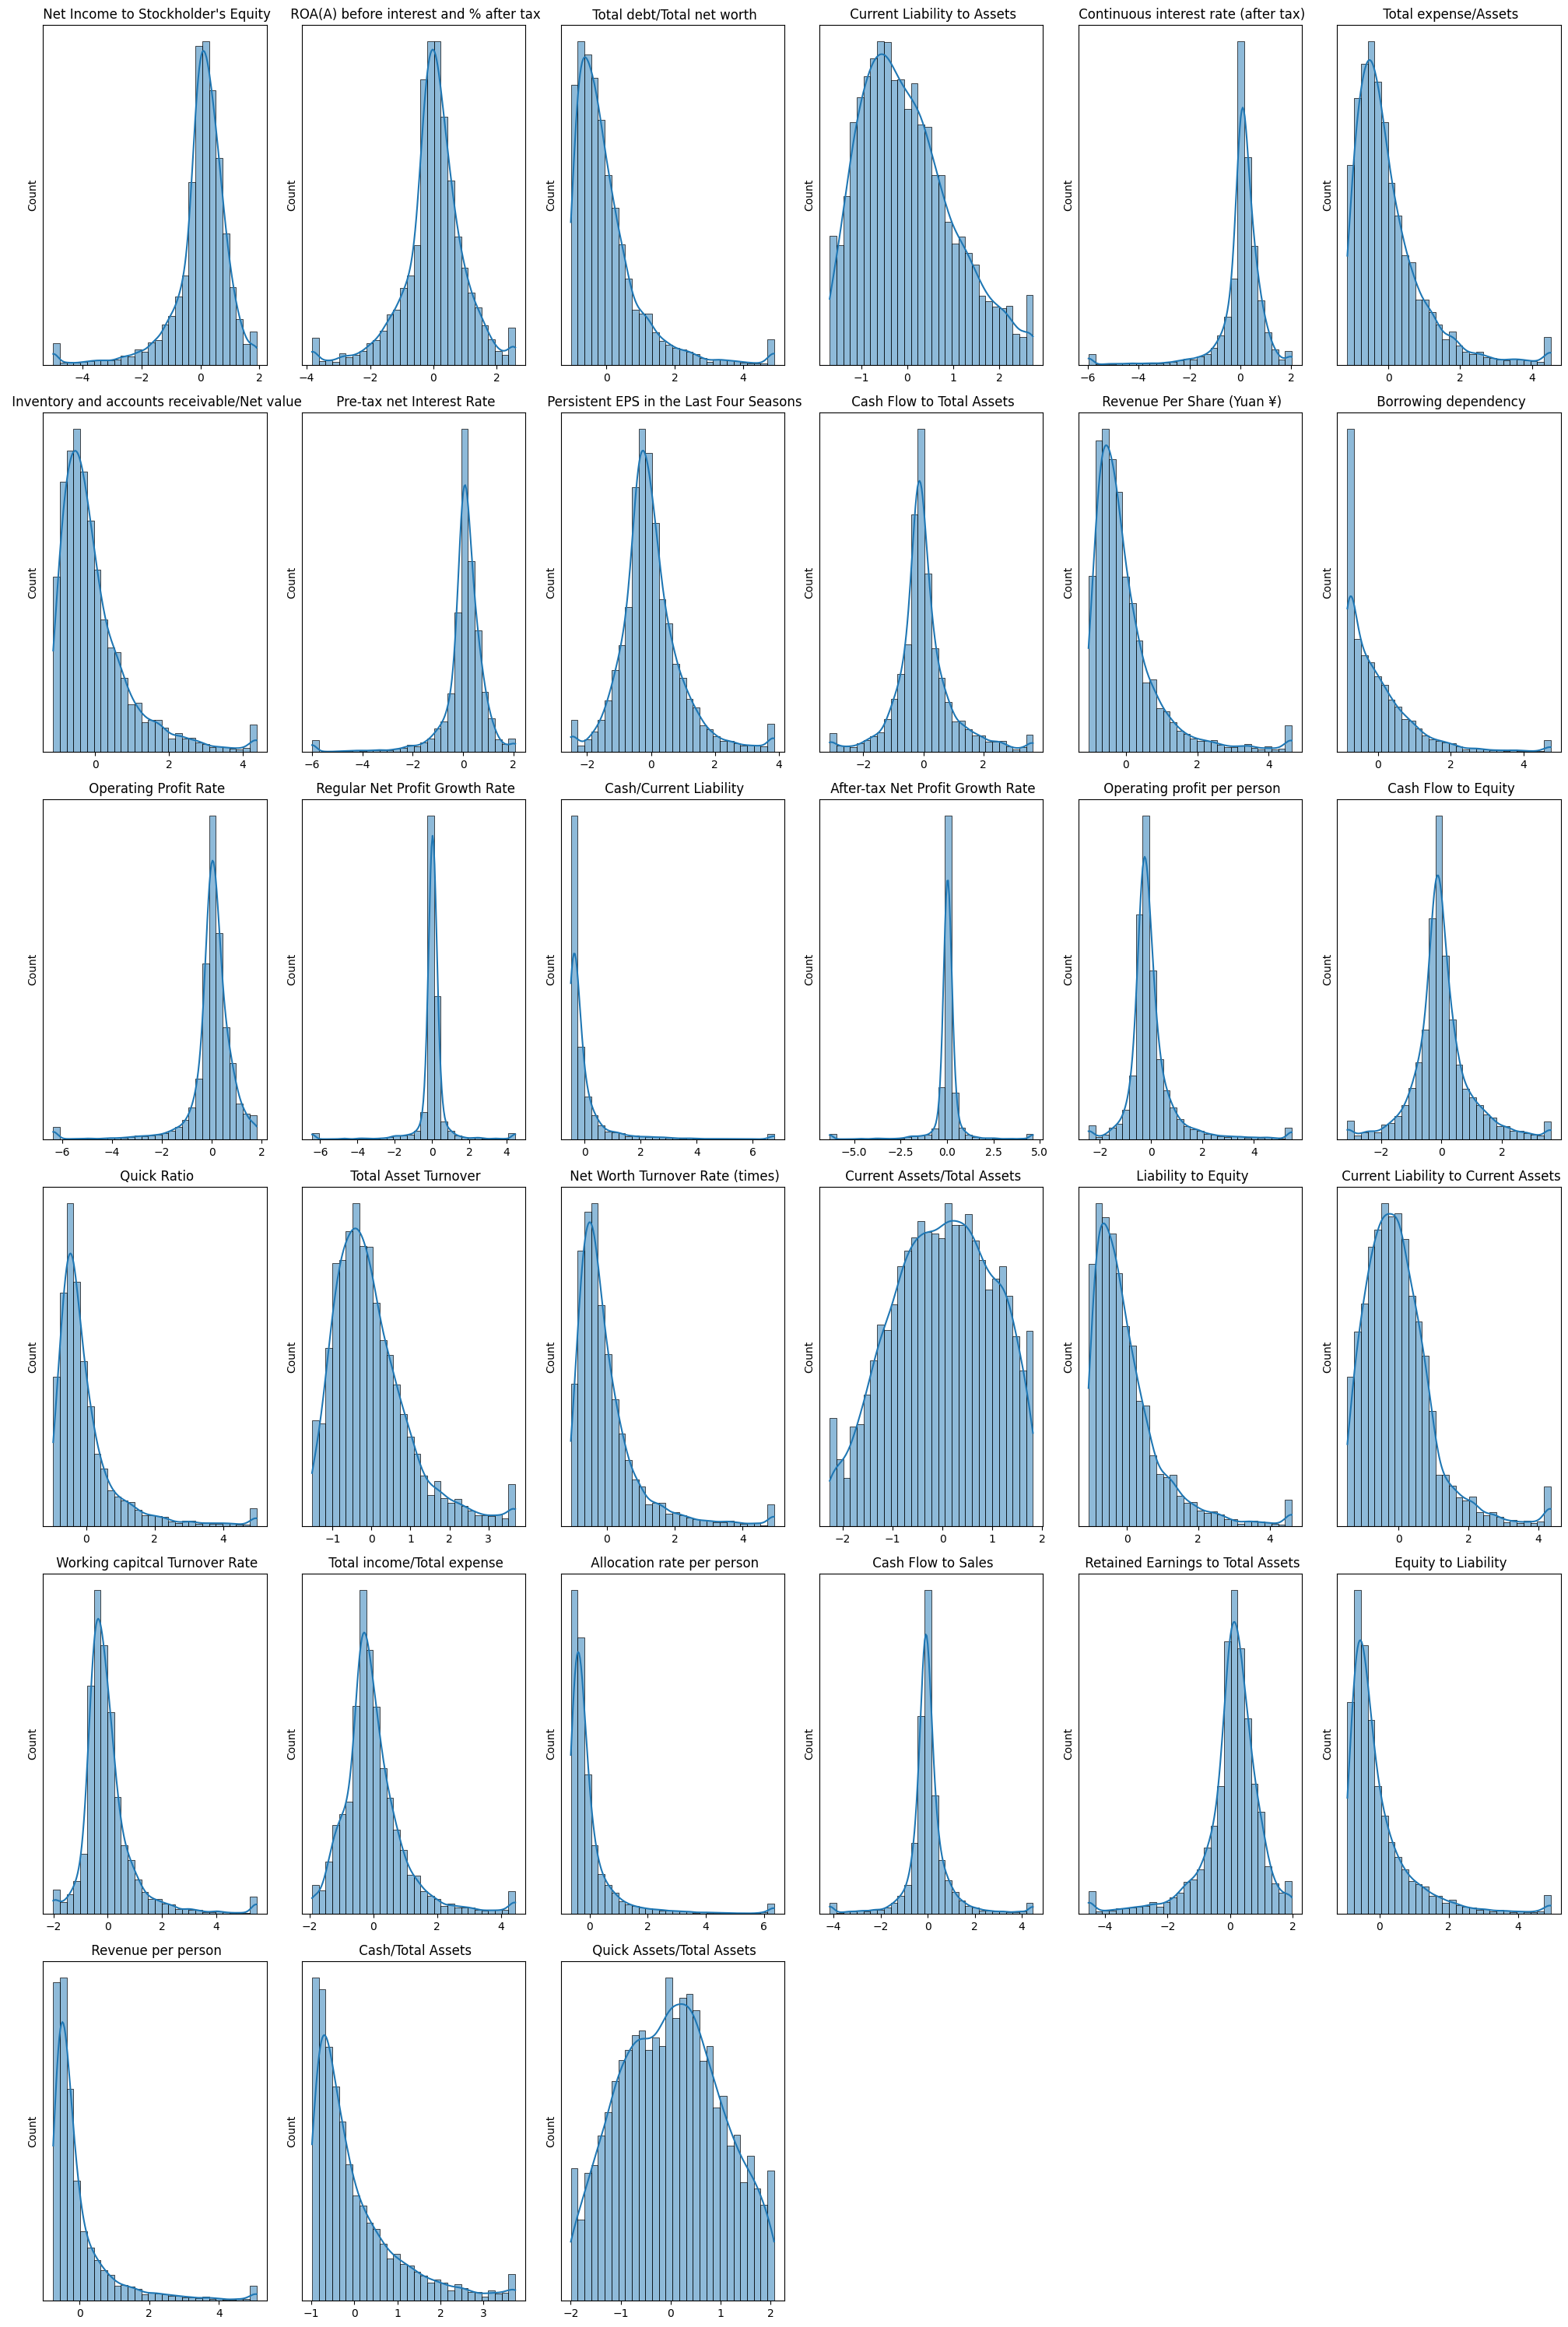

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

num_features = X_train_Final.shape[1]
num_rows = (num_features - 1) // 6 + 1 
plt.figure(figsize=(20, 5 * num_rows))

for i, feature in enumerate(X_train_Final.columns):
    plt.subplot(num_rows, 6, i + 1)
    sns.histplot(X_train_Final[feature], kde=True, bins=30)
    plt.title(f'{feature}')
    plt.xlabel('')  
    plt.yticks([])  

plt.tight_layout()
plt.show()

## Some of them are right skewed, if we look into them we can see the outliers are very large towards right side, so either we can use robust Scaler to scale that or we can let it be, although it will create noise in the model but if the outliers are just not being limited after preprocessing, we would have to remove them but that will cause loss of data which we are not willing to do

# Model Selection and Validation

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, make_scorer, fbeta_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
# from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier


In [40]:
models = {
    'Random Forest': (RandomForestClassifier(random_state=42), {
        'model__n_estimators': [100, 200],
        'model__max_depth': [None, 10, 20],
        'model__class_weight': ['balanced']
    }),
    'Logistic Regression': (LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42), {
        'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
        'model__solver': ['lbfgs', 'saga', 'newton-cg', 'sag'],
        'model__class_weight': ['balanced']
    }),
    'SVM': (SVC(probability=True, random_state=42), {
        'model__C': [0.1, 1, 10],
        'model__kernel': ['linear', 'rbf'],
        'model__class_weight': ['balanced']
    }),
    'AdaBoost': (AdaBoostClassifier(random_state=42), {
        'model__n_estimators': [50, 100],
        'model__learning_rate': [0.01, 0.1, 1]
    }),
    'Gradient Boosting': (GradientBoostingClassifier(random_state=42), {
        'model__n_estimators': [100, 200],
        'model__learning_rate': [0.01, 0.1, 1]
    }),
    'XGBoost': (XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'), {
        'model__n_estimators': [100, 200],
        'model__learning_rate': [0.01, 0.1, 1]
    }),
    'ANN': (MLPClassifier(random_state=42, max_iter=500, early_stopping=True), {
        'model__hidden_layer_sizes': [(100,), (50, 50)],
        'model__activation': ['relu', 'tanh'],
        'model__solver': ['adam', 'sgd']
    })
}

In [41]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Define the F2 scorer
f2_scorer = make_scorer(fbeta_score, beta=2)

# # Split data into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize results dataframe
results_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'])


Training Random Forest...
Random Forest - Done
Training Logistic Regression...
Logistic Regression - Done
Training SVM...
SVM - Done
Training AdaBoost...
AdaBoost - Done
Training Gradient Boosting...
Gradient Boosting - Done
Training XGBoost...
XGBoost - Done
Training ANN...
ANN - Done
                 Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
0        Random Forest  0.934751   0.304348  0.795455  0.440252  0.931379
1  Logistic Regression  0.870235   0.175610  0.818182  0.289157  0.943182
2                  SVM  0.906891   0.178295  0.522727  0.265896  0.895919
3             AdaBoost  0.895161   0.196319  0.727273  0.309179  0.911088
4    Gradient Boosting  0.924487   0.243478  0.636364  0.352201  0.893457
5              XGBoost  0.931085   0.288136  0.772727  0.419753  0.936174
6                  ANN  0.922287   0.232759  0.613636  0.337500  0.911157


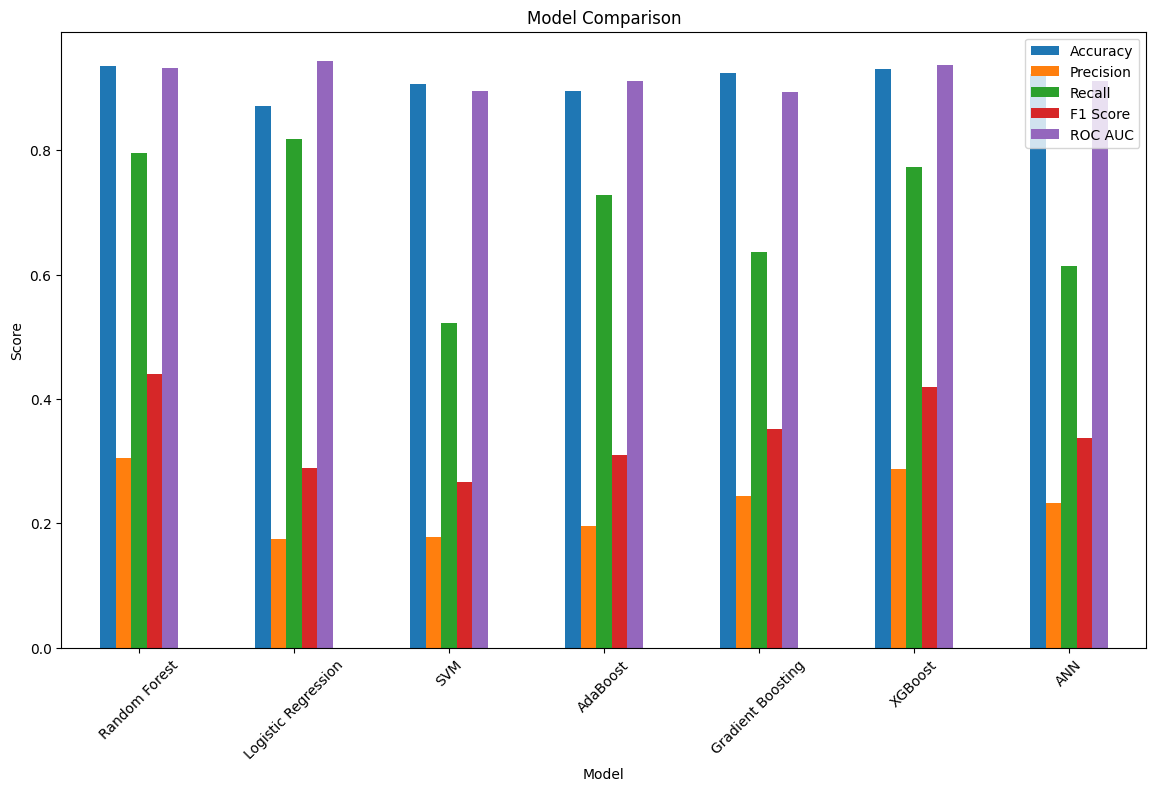

In [ ]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Define the F2 scorer
f2_scorer = make_scorer(fbeta_score, beta=2)

# # Split data into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize results dataframe
results_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'])

for model_name, (model, param_grid) in models.items():
    print(f"Training {model_name}...")
    
    # Create the pipeline
    pipeline = Pipeline([
        ('model', model)
    ])
    
    # Perform GridSearchCV
    grid_search = GridSearchCV(pipeline, param_grid, scoring=f2_scorer, cv=5, n_jobs=-1)
    grid_search.fit(X_train_resampled, y_train_resampled)
    
    # Predict on the test set
    y_pred = grid_search.predict(X_test_selected)
    scores = grid_search.predict_proba(X_test_selected)[:, 1]
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, scores)
    
    # Append results
    results_df = pd.concat([results_df, pd.DataFrame([{
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc
    }])], ignore_index=True)

    print(f"{model_name} - Done")

# Display results
print(results_df)

# Visualize results
results_df.set_index('Model', inplace=True)
results_df.plot(kind='bar', figsize=(14, 8))
plt.title('Model Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()


In [ ]:
results_df

,Accuracy,Precision,Recall,F1 Score,ROC AUC
Model,,,,,
Random Forest,0.934751,0.304348,0.795455,0.440252,0.931379
Logistic Regression,0.870235,0.175610,0.818182,0.289157,0.943182
SVM,0.906891,0.178295,0.522727,0.265896,0.895919
AdaBoost,0.895161,0.196319,0.727273,0.309179,0.911088
Gradient Boosting,0.924487,0.243478,0.636364,0.352201,0.893457
XGBoost,0.931085,0.288136,0.772727,0.419753,0.936174
ANN,0.922287,0.232759,0.613636,0.337500,0.911157


# Creating a Baseling Accuracy and F1 by using `print(0)` model
### We could also use Altman Z score which was used to be THE model back in 1970's  https://www.investopedia.com/terms/a/altman.asp

In [ ]:
y_train.value_counts()
baseline_predict = [0] * len(y_test)
print("\nBaseline Model:")
print(classification_report(y_test, baseline_predict,zero_division = 0))
print(f"ROC AUC Score: {roc_auc_score(y_test, baseline_predict)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, baseline_predict)}")

accuracy = accuracy_score(y_test, baseline_predict)
precision = precision_score(y_test, baseline_predict)
recall = recall_score(y_test, baseline_predict)
f1 = f1_score(y_test, baseline_predict)
roc_auc = roc_auc_score(y_test, baseline_predict)




Baseline Model:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1320
           1       0.00      0.00      0.00        44

    accuracy                           0.97      1364
   macro avg       0.48      0.50      0.49      1364
weighted avg       0.94      0.97      0.95      1364

ROC AUC Score: 0.5
Confusion Matrix:
[[1320    0]
 [  44    0]]


In [ ]:
results_df = pd.concat([results_df, pd.DataFrame([{
        'Model': 'Baseline Model',
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc
    }]).set_index('Model')])

In [ ]:
results_df

,Accuracy,Precision,Recall,F1 Score,ROC AUC
Model,,,,,
Random Forest,0.934751,0.304348,0.795455,0.440252,0.931379
Logistic Regression,0.870235,0.175610,0.818182,0.289157,0.943182
SVM,0.906891,0.178295,0.522727,0.265896,0.895919
AdaBoost,0.895161,0.196319,0.727273,0.309179,0.911088
Gradient Boosting,0.924487,0.243478,0.636364,0.352201,0.893457
XGBoost,0.931085,0.288136,0.772727,0.419753,0.936174
ANN,0.922287,0.232759,0.613636,0.337500,0.911157
Baseline Model,0.967742,0.000000,0.000000,0.000000,0.500000


# Plotting every metric

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns
import plotly.offline as pyo
import plotly.express as px

# Activate the offline mode for Plotly
pyo.init_notebook_mode(connected=True)

# Reset the index to turn the model names into a column
results_df.reset_index(inplace=True)
results_df.rename(columns={'index': 'Model'}, inplace=True)

# Melt the DataFrame to long format for Plotly
results_melted = results_df.melt(id_vars='Model', var_name='Metric', value_name='Value')

# Create the plot
fig = px.bar(results_melted, x='Model', y='Value', color='Metric', barmode='group',
             title='Model Performance Metrics',
             labels={'Value': 'Score', 'Model': 'Model'})

# Show the plot in Jupyter notebook
pyo.iplot(fig)

In [ ]:
# Melt the DataFrame to long format for Plotly
results_melted = results_df.melt(id_vars='Model', var_name='Metric', value_name='Value')

# Create the line plot
fig = px.line(results_melted, x='Metric', y='Value', color='Model', markers=True,
              title='Model Performance Metrics',
              labels={'Value': 'Score', 'Metric': 'Metric'})

# Show the plot in Jupyter notebook
pyo.iplot(fig)

In [ ]:
results_df

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,Random Forest,0.934751,0.304348,0.795455,0.440252,0.931379
1,Logistic Regression,0.870235,0.175610,0.818182,0.289157,0.943182
2,SVM,0.906891,0.178295,0.522727,0.265896,0.895919
3,AdaBoost,0.895161,0.196319,0.727273,0.309179,0.911088
4,Gradient Boosting,0.924487,0.243478,0.636364,0.352201,0.893457
5,XGBoost,0.931085,0.288136,0.772727,0.419753,0.936174
6,ANN,0.922287,0.232759,0.613636,0.337500,0.911157
7,Baseline Model,0.967742,0.000000,0.000000,0.000000,0.500000


# None of the Algorithms are giving particularly good F1 score, even with all the techniques applied
### This score is also shown by in Research Papers(Given in the [reference](#ref4)) and one on the same dataset. Either we can improve on this by adjusting for sensitivity and creating a boosting algo or we can create an anomaly detection algo which can give good results

### NOTE: I saw many jupyter notebooks who have f1 score as high as 95% + on kaggle, The thing is, we can also get that score but The caveat is that we would have to introduce [Data Leakage](#ref5) 
for more info:

https://stackoverflow.com/questions/66120039/undersampling-before-or-after-train-test-split

https://datascience.stackexchange.com/questions/104428/imbalanced-dataset-train-test-split-before-and-after-smote

For now lets focus on XGB and Random Forest we will be stacking them together 

# HyperParameter Tuning Using Optuna and then Stacking the models using LogReg

In [ ]:
!pip install optuna

In [44]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, make_scorer, fbeta_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingClassifier


# Random Forest Tuning

In [45]:
# Suppress Optuna INFO messages
# optuna.logging.set_verbosity(optuna.logging.WARNING)

def rf_objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 100, 200)
    max_depth = trial.suggest_int('max_depth', 10, 20)
    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    
    model.fit(X_train_resampled, y_train_resampled)
    y_pred_prob = model.predict_proba(X_test_selected)[:, 1]
    
    threshold = trial.suggest_float('threshold', 0.1, 0.9)
    y_pred = (y_pred_prob >= threshold).astype(int)
    
    f1 = f1_score(y_test, y_pred)
    return f1

rf_study = optuna.create_study(direction='maximize')
rf_study.optimize(rf_objective, n_trials=50)
best_rf_params = rf_study.best_params


In [46]:
best_rf_params

{'n_estimators': 165, 'max_depth': 10, 'threshold': 0.6804994261053934}

# XGB Tuning

In [47]:
def xgb_objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 100, 200)
    learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 1.0)
    model = XGBClassifier(n_estimators=n_estimators, learning_rate=learning_rate, random_state=42)
    
    model.fit(X_train_resampled, y_train_resampled)
    y_pred_prob = model.predict_proba(X_test_selected)[:, 1]
    
    threshold = trial.suggest_float('threshold', 0.1, 0.9)
    y_pred = (y_pred_prob >= threshold).astype(int)
    
    f1 = f1_score(y_test, y_pred)
    return f1

xgb_study = optuna.create_study(direction='maximize')
xgb_study.optimize(xgb_objective, n_trials=50)
best_xgb_params = xgb_study.best_params


In [48]:
best_xgb_params

{'n_estimators': 160,
 'learning_rate': 0.03556957560656124,
 'threshold': 0.895918253948625}

In [124]:
rf_model = RandomForestClassifier(
    n_estimators=best_rf_params['n_estimators'],
    max_depth=best_rf_params['max_depth'],
    random_state=42
)

xgb_model = XGBClassifier(
    n_estimators=best_xgb_params['n_estimators'],
    learning_rate=best_xgb_params['learning_rate'],
    random_state=42
)

stacked_model = StackingClassifier(
    estimators=[
        ('rf', rf_model),
        ('xgb', xgb_model)
    ],
    final_estimator=LogisticRegression()
)

# Train the stacked model
stacked_model.fit(X_train_resampled, y_train_resampled)

# Predict with optimized thresholds (use a common threshold for simplicity)
threshold = min(best_rf_params['threshold'], best_xgb_params['threshold'])
# threshold=0.7
y_pred_prob = stacked_model.predict_proba(X_test_selected)[:, 1]
y_pred = (y_pred_prob >= threshold).astype(int)

# Evaluate the stacked model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC: {roc_auc}")


Accuracy: 0.9369501466275659
Precision: 0.3018867924528302
Recall: 0.7272727272727273
F1 Score: 0.4266666666666667
ROC AUC: 0.9289772727272728


In [73]:
# Predict with optimized thresholds (use a common threshold for simplicity)
threshold = min(best_rf_params['threshold'], best_xgb_params['threshold'])
# threshold=0.7
y_pred_prob = stacked_model.predict_proba(X_test_selected)[:, 1]
y_pred = (y_pred_prob >= threshold).astype(int)

# Evaluate the stacked model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC: {roc_auc}")

Accuracy: 0.9369501466275659
Precision: 0.3018867924528302
Recall: 0.7272727272727273
F1 Score: 0.4266666666666667
ROC AUC: 0.9289772727272728


# Lets study the Confusion Matrix

In [53]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Predict with optimized threshold
y_pred_prob = stacked_model.predict_proba(X_test_Final)[:, 1]
y_pred = (y_pred_prob >= threshold).astype(int)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Print the confusion matrix and metrics
print("Confusion Matrix:")
print(conf_matrix)
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP - Type I Error): {fp}")
print(f"False Negatives (FN - Type II Error): {fn}")
print(f"True Positives (TP): {tp}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC: {roc_auc}")


Confusion Matrix:
[[1262   58]
 [  15   29]]
True Negatives (TN): 1262
False Positives (FP - Type I Error): 58
False Negatives (FN - Type II Error): 15
True Positives (TP): 29
Accuracy: 0.9464809384164223
Precision: 0.3333333333333333
Recall: 0.6590909090909091
F1 Score: 0.44274809160305345
ROC AUC: 0.9289772727272728


### Here we can see 
[TN,FP
 FN,TP]
 IN our case We have to make sure F1 score is high and Sensitivity(Recall) is relatively high
 For a Company to predict if they will be bankrupt if they follow the current route using The financial ratios, We have to be strict with analyzing the Bankruptcy i.e we have to be strict on label-1 i.e increase the threshold for detection which means high amount of FP and low amount of FN
 As to why not we just make the whole metrix about Recall? well we can but that would mean the model will be untrustworthy, why would anyone even test the model if they all know it is going to give the company except top companies bankrupcy status anyways.

In [51]:
from IPython.display import display, Markdown

# Create the markdown string with variables
markdown_content = f"""
### Confusion Matrix
- **True Negatives (TN):** {tn}
  - The model correctly identified {tn} instances as non-bankrupt (0).

- **False Positives (FP - Type I Error):** {fp}
  - The model incorrectly classified {fp} non-bankrupt instances as bankrupt (1).

- **False Negatives (FN - Type II Error):** {fn}
  - The model incorrectly classified {fn} bankrupt instances as non-bankrupt (0).

- **True Positives (TP):** {tp}
  - The model correctly identified {tp} instances as bankrupt (1).

### Performance Metrics
- **Accuracy:** {accuracy:.4f}
  - Accuracy is the proportion of true results (both true positives and true negatives) among the total number of cases examined. It indicates that the model correctly classified {accuracy:.4f}% of the instances.

- **Precision:** {precision:.4f}
  - Precision is the proportion of true positive results in the predicted positive results. Here, {precision:.4f}% of the instances that the model classified as bankrupt were actually bankrupt. This is relatively low, indicating that there are many false positives.

- **Recall (Sensitivity):** {recall:.4f}
  - Recall is the proportion of true positive results in the actual positive results. The model correctly identified {recall:.4f}% of the bankrupt instances. This is quite good, indicating that the model is effective at catching most of the bankrupt instances.

- **F1 Score:** {f1:.4f}
  - The F1 score is the harmonic mean of precision and recall. It balances precision and recall, and here it is {f1:.4f}, indicating moderate performance in both aspects.

- **ROC AUC:** {roc_auc:.4f}
  - The ROC AUC score is a measure of how well the model distinguishes between the classes. A score of {roc_auc:.4f} indicates that the model has a high ability to distinguish between bankrupt and non-bankrupt instances.
"""

# Display the markdown content
display(Markdown(markdown_content))





### Confusion Matrix
- **True Negatives (TN):** 1262
  - The model correctly identified 1262 instances as non-bankrupt (0).

- **False Positives (FP - Type I Error):** 58
  - The model incorrectly classified 58 non-bankrupt instances as bankrupt (1).

- **False Negatives (FN - Type II Error):** 15
  - The model incorrectly classified 15 bankrupt instances as non-bankrupt (0).

- **True Positives (TP):** 29
  - The model correctly identified 29 instances as bankrupt (1).

### Performance Metrics
- **Accuracy:** 0.9465
  - Accuracy is the proportion of true results (both true positives and true negatives) among the total number of cases examined. It indicates that the model correctly classified 0.9465% of the instances.

- **Precision:** 0.3333
  - Precision is the proportion of true positive results in the predicted positive results. Here, 0.3333% of the instances that the model classified as bankrupt were actually bankrupt. This is relatively low, indicating that there are many false positives.

- **Recall (Sensitivity):** 0.6591
  - Recall is the proportion of true positive results in the actual positive results. The model correctly identified 0.6591% of the bankrupt instances. This is quite good, indicating that the model is effective at catching most of the bankrupt instances.

- **F1 Score:** 0.4427
  - The F1 score is the harmonic mean of precision and recall. It balances precision and recall, and here it is 0.4427, indicating moderate performance in both aspects.

- **ROC AUC:** 0.9290
  - The ROC AUC score is a measure of how well the model distinguishes between the classes. A score of 0.9290 indicates that the model has a high ability to distinguish between bankrupt and non-bankrupt instances.



### Interpretation
- **High Accuracy and ROC AUC:**
  - The model performs well overall, correctly classifying most instances and effectively distinguishing between bankrupt and non-bankrupt cases.

- **High Recall, Low Precision:**
  - The model has a high recall, meaning it successfully identifies most of the bankrupt cases. However, the precision is low, indicating that many of the instances it identifies as bankrupt are actually non-bankrupt. This results in a higher number of false positives .

- **False Positives vs. False Negatives:**
  - There are more false positives than false negatives . This means that the model is more likely to incorrectly classify a non-bankrupt instance as bankrupt than the other way around. In the context of bankruptcy prediction, this may be a cautious approach, ensuring that potential bankruptcies are flagged, even at the cost of some false alarms.

- **Balancing Precision and Recall:**
  - Given the importance of detecting bankruptcies (recall), the model's current threshold is achieving a good balance. However, depending on your application's tolerance for false positives, you might want to further adjust the threshold or employ additional strategies to improve precision without significantly impacting recall.

# Conclusion
- The model is good at identifying bankrupt instances (high recall), but there is a trade-off with precision, resulting in a notable number of false positives. The high ROC AUC indicates strong overall performance, suggesting that the model is well-calibrated for distinguishing between the classes. Further fine-tuning of the threshold or additional techniques might be employed to improve precision if false positives are a concern

# Downloading the model locally

In [72]:
min(best_rf_params['threshold'], best_xgb_params['threshold'])

0.6804994261053934

In [92]:
import joblib
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

class CombinedModel:
    def __init__(self, preprocessing_pipeline, model, threshold=0.6804994261053934):
        self.preprocessing_pipeline = preprocessing_pipeline
        self.model = model
        self.threshold = threshold
        self.data_storage = []  # To store incoming data for retraining

    def predict(self, X):
        X_processed = self.preprocessing_pipeline.transform(X)
        y_pred_prob = self.model.predict_proba(X_processed)[:, 1]
        return (y_pred_prob >= self.threshold).astype(int)

    def predict_proba(self, X):
        X_processed = self.preprocessing_pipeline.transform(X)
        return self.model.predict_proba(X_processed)

    def save(self, filepath):
        with open(filepath, 'wb') as f:
            joblib.dump(self, f)

    @staticmethod
    def load(filepath):
        with open(filepath, 'rb') as f:
            return joblib.load(f)

    def store_data(self, X, y):
        self.data_storage.append((X, y))

    def get_stored_data(self):
        X_data = np.concatenate([data[0] for data in self.data_storage], axis=0)
        y_data = np.concatenate([data[1] for data in self.data_storage], axis=0)
        return X_data, y_data



In [134]:
thresholds['medium']

0.01

## Same Pipeline as we created before

In [135]:
preprocessing_pipeline_final = Pipeline(steps=[
    ('outlier_capper', OutlierCapper()),
    ('constant_filter', DataFrameVarianceThreshold(threshold=0)),
    ('log_transform', DF_log_transform()),
    ('scaler', DataFrameScaler()),
    ('feature_selector', FeatureSelector(threshold=0.01))
])

# Fit the pipeline on the training data
# preprocessing_pipeline_final.fit(X_train,y_train)




In [129]:
X_train

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
318,0.493784,0.550153,0.544622,0.598524,0.598524,0.998980,0.797443,0.809355,0.303595,0.781616,...,0.806631,0.001637,0.623661,0.598521,0.840649,0.276281,0.026814,0.565265,1,0.070742
5796,0.534393,0.590765,0.573425,0.599302,0.599173,0.999023,0.797454,0.809359,0.303524,0.781621,...,0.827723,0.001079,0.624307,0.599298,0.843248,0.282615,0.026852,0.565433,1,0.022433
4454,0.526398,0.586895,0.566519,0.606740,0.606740,0.999103,0.797606,0.809470,0.303622,0.781718,...,0.828627,0.002505,0.624714,0.606739,0.841982,0.276632,0.026791,0.565159,1,0.059856
2225,0.469702,0.536851,0.521066,0.595375,0.595375,0.998967,0.797390,0.809313,0.303530,0.781572,...,0.797846,0.003100,0.624621,0.595370,0.840248,0.283786,0.027673,0.567450,1,0.020864
3249,0.391557,0.443197,0.432464,0.664495,0.664495,0.995856,0.794096,0.806216,0.304281,0.777918,...,0.756573,0.000198,0.624242,0.664491,0.838115,0.275114,0.026791,0.565158,1,0.233952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4688,0.550090,0.563890,0.593501,0.602221,0.602221,0.999046,0.797482,0.809400,0.303527,0.781665,...,0.811639,0.318807,0.623799,0.602217,0.841515,0.281613,0.026865,0.565486,1,0.024197
1078,0.481597,0.528129,0.530007,0.605933,0.605954,0.999021,0.797349,0.809262,0.303343,0.781612,...,0.791904,0.001990,0.623473,0.605932,0.839643,0.282249,0.025451,0.588994,1,0.023023
6687,0.622288,0.707697,0.689330,0.614293,0.603353,0.998882,0.799178,0.811001,0.306831,0.783383,...,0.875503,0.002238,0.624557,0.614294,0.844092,0.275407,0.026794,0.565172,1,0.143685
2623,0.586847,0.642172,0.623374,0.609774,0.609759,0.999064,0.797540,0.809426,0.303589,0.781686,...,0.856548,0.000987,0.623850,0.609770,0.843796,0.277000,0.026791,0.565159,1,0.051988


In [130]:
new_data

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
1244,0.503242,0.556149,0.552278,0.609399,0.609399,0.999043,0.797445,0.809349,0.303466,0.781609,...,0.805667,0.000830,0.623746,0.609399,0.841004,0.282359,0.027273,0.566736,1,0.022839
6303,0.485984,0.547754,0.530649,0.598812,0.598812,0.999002,0.797424,0.809331,0.303516,0.781591,...,0.803448,0.001949,0.623652,0.598810,0.840585,0.278525,0.027098,0.566292,1,0.035415
4712,0.554380,0.618513,0.609562,0.607857,0.607886,0.999043,0.797758,0.809638,0.304012,0.781922,...,0.839238,0.002042,0.623843,0.607852,0.843206,0.278607,0.026816,0.565273,1,0.034892
3273,0.663920,0.692324,0.709246,0.630097,0.630097,0.999314,0.797808,0.809651,0.303533,0.781935,...,0.879037,0.001139,0.624215,0.630092,0.844936,0.276559,0.026805,0.565222,1,0.061798
6430,0.450641,0.509976,0.495423,0.650492,0.650226,0.998738,0.797212,0.809081,0.303697,0.781240,...,0.782600,0.000845,0.623938,0.650488,0.839382,0.275173,0.026709,0.564734,1,0.207130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4163,0.485010,0.571849,0.533166,0.596009,0.596016,0.998993,0.797445,0.809361,0.303570,0.781590,...,0.817094,0.128326,0.624345,0.596005,0.841934,0.280973,0.026812,0.565254,1,0.025617
635,0.482328,0.539304,0.533915,0.601508,0.601594,0.998971,0.797374,0.809312,0.303494,0.781570,...,0.796868,0.001333,0.623546,0.601509,0.840141,0.283866,0.022002,0.571624,1,0.020771
6086,0.522352,0.580844,0.563895,0.599101,0.599101,0.999025,0.797482,0.809378,0.303570,0.781642,...,0.824578,0.002461,0.624393,0.599101,0.842427,0.280082,0.026797,0.565185,1,0.028154
2308,0.480330,0.547372,0.530917,0.596672,0.596600,0.998990,0.797422,0.809339,0.303536,0.781598,...,0.804941,0.007575,0.623754,0.596672,0.841049,0.284223,0.026808,0.565239,1,0.020377


In [118]:
preprocessing_pipeline_final.transform(new_data)

,Net Income to Stockholder's Equity,ROA(A) before interest and % after tax,Total debt/Total net worth,Current Liability to Assets,Continuous interest rate (after tax),Total expense/Assets,Inventory and accounts receivable/Net value,Pre-tax net Interest Rate,Persistent EPS in the Last Four Seasons,Cash Flow to Total Assets,...,Current Liability to Current Assets,Working capitcal Turnover Rate,Total income/Total expense,Allocation rate per person,Cash Flow to Sales,Retained Earnings to Total Assets,Equity to Liability,Revenue per person,Cash/Total Assets,Quick Assets/Total Assets
0,0.082080,-0.016637,0.477838,0.273576,0.033974,0.312597,0.248741,0.050736,-0.241573,-0.284044,...,0.397788,-0.499648,-0.363819,-0.050176,-0.167526,-0.032040,-0.650887,-0.488551,-0.588464,-0.195612
1,-0.061449,-0.158133,-0.327780,0.389474,-0.020263,-0.692648,-0.333770,-0.008417,-0.281871,-0.419194,...,1.106931,-0.740197,-0.207921,-0.589782,-0.206310,0.503023,-0.287447,1.428954,-0.849866,-0.296406
2,0.834542,1.011182,-0.310506,-0.252840,0.994217,-0.632471,-0.602406,0.937168,1.108506,0.032387,...,0.491692,-0.485834,1.156881,-0.292200,0.088009,0.587601,-0.302489,-0.631081,-0.247079,-0.476764
3,1.424935,2.177681,-0.742515,-0.901399,1.036393,0.636638,-0.725864,1.079735,1.951506,0.305558,...,-0.993049,0.225439,0.633126,0.079873,0.148329,1.521848,0.460881,0.038786,2.126061,0.902229
4,-0.472863,-0.804514,-1.035584,-1.571100,-1.096066,1.316775,-1.091898,-0.608998,-0.757029,-1.057161,...,-1.263667,1.851016,-0.664299,-0.227332,-2.010178,-0.390102,4.276164,-0.701983,-0.434384,-0.134074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1359,0.399950,0.245943,0.187091,1.135341,-0.022845,-1.007818,0.498191,0.052303,0.105029,0.741930,...,0.435110,-0.551759,1.184530,-0.125428,0.197564,0.178360,-0.570248,5.078148,-0.165266,0.805074
1360,-0.213041,-0.301326,0.793345,0.350894,-0.083970,-0.377246,0.438294,-0.149447,-0.483874,0.028429,...,0.471133,-0.489598,-0.499853,-0.364531,0.026514,-0.196639,-0.711099,-0.657350,-0.661309,-0.588722
1361,0.568462,0.395200,-0.000048,0.854153,0.135559,-0.898071,1.277916,0.156505,0.560849,-0.343219,...,-0.291388,-0.206869,1.234914,-0.329970,-0.156197,0.525959,-0.496743,2.416639,-0.283702,1.176178
1362,0.097271,-0.164583,0.867871,1.571303,0.000830,-1.098663,1.118854,-0.014293,-0.142807,-0.541134,...,0.391187,-0.422736,0.457675,-0.531269,-0.271988,-0.048544,-0.722586,0.190454,-0.698736,0.844344


In [122]:
# Initialize the combined model with the fitted model and preprocessing pipeline
combined_model = CombinedModel(preprocessing_pipeline=preprocessing_pipeline_final, model=stacked_model)

# Save the combined model
# combined_model.save('combined_model_test.pkl')

In [63]:
with open('combined_model_test.pkl', 'rb') as f:
    model=joblib.load(f)

In [128]:
X_train

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
318,0.493784,0.550153,0.544622,0.598524,0.598524,0.998980,0.797443,0.809355,0.303595,0.781616,...,0.806631,0.001637,0.623661,0.598521,0.840649,0.276281,0.026814,0.565265,1,0.070742
5796,0.534393,0.590765,0.573425,0.599302,0.599173,0.999023,0.797454,0.809359,0.303524,0.781621,...,0.827723,0.001079,0.624307,0.599298,0.843248,0.282615,0.026852,0.565433,1,0.022433
4454,0.526398,0.586895,0.566519,0.606740,0.606740,0.999103,0.797606,0.809470,0.303622,0.781718,...,0.828627,0.002505,0.624714,0.606739,0.841982,0.276632,0.026791,0.565159,1,0.059856
2225,0.469702,0.536851,0.521066,0.595375,0.595375,0.998967,0.797390,0.809313,0.303530,0.781572,...,0.797846,0.003100,0.624621,0.595370,0.840248,0.283786,0.027673,0.567450,1,0.020864
3249,0.391557,0.443197,0.432464,0.664495,0.664495,0.995856,0.794096,0.806216,0.304281,0.777918,...,0.756573,0.000198,0.624242,0.664491,0.838115,0.275114,0.026791,0.565158,1,0.233952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4688,0.550090,0.563890,0.593501,0.602221,0.602221,0.999046,0.797482,0.809400,0.303527,0.781665,...,0.811639,0.318807,0.623799,0.602217,0.841515,0.281613,0.026865,0.565486,1,0.024197
1078,0.481597,0.528129,0.530007,0.605933,0.605954,0.999021,0.797349,0.809262,0.303343,0.781612,...,0.791904,0.001990,0.623473,0.605932,0.839643,0.282249,0.025451,0.588994,1,0.023023
6687,0.622288,0.707697,0.689330,0.614293,0.603353,0.998882,0.799178,0.811001,0.306831,0.783383,...,0.875503,0.002238,0.624557,0.614294,0.844092,0.275407,0.026794,0.565172,1,0.143685
2623,0.586847,0.642172,0.623374,0.609774,0.609759,0.999064,0.797540,0.809426,0.303589,0.781686,...,0.856548,0.000987,0.623850,0.609770,0.843796,0.277000,0.026791,0.565159,1,0.051988


In [112]:
new_data=X_test.copy()

In [133]:
# new_data.to_csv('test_data.csv',index=False)

In [115]:
model

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(max_depth=10,
                                                       n_estimators=165,
                                                       random_state=42)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None...
                                              interaction_constraints=None,
                                              learning_rate=0.03556957560656124,
                                              max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=160, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=42, ...))],
                   final_estimator=LogisticRegression())

In [123]:
combined_model.predict(new_data)

array([0, 0, 0, ..., 0, 0, 1])

Pipeline(steps=[('outlier_capper', OutlierCapper()),
                ('constant_filter', DataFrameVarianceThreshold()),
                ('log_transform', DF_log_transform()),
                ('scaler', DataFrameScaler()),
                ('feature_selector',
                 FeatureSelector(coefficients=array([-0.00504787,  0.04703657, -0.00310353, -0.00507685, -0.00755652,
        0.0192607 ,  0.02635031, -0.00841511, -0.00281712, -0.0320738 ,
        0.00072108,  0....
        0.0061312 , -0.00342376, -0.00176202, -0.00112141, -0.00405035,
       -0.00354033,  0.00113262, -0.0107237 ,  0.01229856,  0.02904457,
        0.00301638, -0.00283486,  0.01252643,  0.0007619 , -0.01074191,
       -0.00257381, -0.00112141, -0.00354033,  0.00824663,  0.02108313,
       -0.0005421 , -0.00691995, -0.01528292,  0.01269551, -0.00154073,
        0.00138884, -0.00078042, -0.00507665, -0.05093324, -0.01277875,
        0.00613312, -0.0083163 ,  0.01049594]),
                                 thresholds=0.01))])

In [125]:
combined_model.threshold

0.6804994261053934

In [136]:
import joblib

# Save components separately
joblib.dump(preprocessing_pipeline_final, 'preprocessing_pipeline.pkl')
# joblib.dump(stacked_model, 'model.pkl')
# joblib.dump(combined_model.threshold, 'threshold.pkl')

# # Load components separately
# preprocessing_pipeline = joblib.load('preprocessing_pipeline.pkl')
# model = joblib.load('model.pkl')
# threshold = joblib.load('threshold.pkl')

# # Recreate the combined model
# loaded_model = CombinedModel(preprocessing_pipeline, model, threshold)

['preprocessing_pipeline.pkl']

In [80]:
combined_model.threshold

0.6804994261053934

In [82]:
# Load components separately
preprocessing_pipeline = joblib.load('preprocessing_pipeline.pkl')
model = joblib.load('model.pkl')
threshold = joblib.load('threshold.pkl')

# Recreate the combined model
loaded_model = CombinedModel(preprocessing_pipeline, model, threshold)

<a id="ref3"></a>
# Interpreting Original Data with Statistics 

In [59]:
from scipy import stats
import statsmodels.api as sm

X, y = X.align(y, join='inner', axis=0)

X = sm.add_constant(X)  # Add a constant term to the model for mathematical convenience

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Create a summary dataframe
summary_df = pd.DataFrame({
    'Variable': X.columns,
    'Coefficient': model.params,
    'Std. Err.': model.bse,
    't_statistic': model.tvalues,
    'P>|z|': model.pvalues,
    '[0.025': model.conf_int()[0],
    '0.975]': model.conf_int()[1]
})

# Sort by p-value
summary_df = summary_df.sort_values('P>|z|')

# Print the summary
summary_df



,Variable,Coefficient,Std. Err.,t_statistic,P>|z|,[0.025,0.975]
Net Income to Total Assets,Net Income to Total Assets,-2.825518e+00,2.582669e-01,-10.940301,1.262358e-27,-3.331802e+00,-2.319233e+00
ROA(A) before interest and % after tax,ROA(A) before interest and % after tax,1.500896e+00,1.940568e-01,7.734314,1.191715e-14,1.120483e+00,1.881309e+00
Retained Earnings to Total Assets,Retained Earnings to Total Assets,1.024589e+00,1.466269e-01,6.987727,3.062130e-12,7.371537e-01,1.312024e+00
Liability-Assets Flag,Liability-Assets Flag,5.609477e-01,8.427967e-02,6.655789,3.039830e-11,3.957329e-01,7.261626e-01
Contingent liabilities/Net worth,Contingent liabilities/Net worth,-2.505645e+00,4.959759e-01,-5.051949,4.488434e-07,-3.477915e+00,-1.533375e+00
...,...,...,...,...,...,...,...
Quick Asset Turnover Rate,Quick Asset Turnover Rate,1.394511e-13,6.838270e-13,0.203927,8.384164e-01,-1.201066e-12,1.479968e-12
Cash Reinvestment %,Cash Reinvestment %,-3.443265e-02,1.794673e-01,-0.191860,8.478574e-01,-3.862454e-01,3.173801e-01
Quick Assets/Current Liability,Quick Assets/Current Liability,-2.308381e-12,1.254731e-11,-0.183974,8.540393e-01,-2.690508e-11,2.228832e-11
Operating Profit Growth Rate,Operating Profit Growth Rate,-4.439801e-02,2.486302e-01,-0.178570,8.582804e-01,-5.317920e-01,4.429960e-01


## The p value here if less than significance level is basically confirming that the variable/feature has large impact on the target but on the other hand it doesn't mean that other feature/variables have no impact

In [60]:
# Set significance level
alpha = 0.05
summary_df['Significance'] = summary_df['P>|z|'].apply(lambda p: 'Reject H0' if p < alpha else '    Failed to reject H0')

In [61]:
summary_df=summary_df.reset_index().drop('index',axis=1)
# Optionally, save to CSV
summary_df.to_csv('financial_ratios_analysis.csv', index=False)

In [62]:
summary_df

,Variable,Coefficient,Std. Err.,t_statistic,P>|z|,[0.025,0.975],Significance
0,Net Income to Total Assets,-2.825518e+00,2.582669e-01,-10.940301,1.262358e-27,-3.331802e+00,-2.319233e+00,Reject H0
1,ROA(A) before interest and % after tax,1.500896e+00,1.940568e-01,7.734314,1.191715e-14,1.120483e+00,1.881309e+00,Reject H0
2,Retained Earnings to Total Assets,1.024589e+00,1.466269e-01,6.987727,3.062130e-12,7.371537e-01,1.312024e+00,Reject H0
3,Liability-Assets Flag,5.609477e-01,8.427967e-02,6.655789,3.039830e-11,3.957329e-01,7.261626e-01,Reject H0
4,Contingent liabilities/Net worth,-2.505645e+00,4.959759e-01,-5.051949,4.488434e-07,-3.477915e+00,-1.533375e+00,Reject H0
...,...,...,...,...,...,...,...,...
90,Quick Asset Turnover Rate,1.394511e-13,6.838270e-13,0.203927,8.384164e-01,-1.201066e-12,1.479968e-12,Failed to reject H0
91,Cash Reinvestment %,-3.443265e-02,1.794673e-01,-0.191860,8.478574e-01,-3.862454e-01,3.173801e-01,Failed to reject H0
92,Quick Assets/Current Liability,-2.308381e-12,1.254731e-11,-0.183974,8.540393e-01,-2.690508e-11,2.228832e-11,Failed to reject H0
93,Operating Profit Growth Rate,-4.439801e-02,2.486302e-01,-0.178570,8.582804e-01,-5.317920e-01,4.429960e-01,Failed to reject H0


In [63]:
significant_summary_df=summary_df.loc[1:10]
Descriptive_Stats=X[significant_summary_df.Variable].describe().T
Descriptive_Stats['Skew']=X[significant_summary_df.Variable].skew()
Descriptive_Stats['Kurtosis']=X[significant_summary_df.Variable].kurtosis()

In [64]:
Descriptive_Stats.to_csv('Descriptive_Stats.csv', index=False)

In [65]:
Descriptive_Stats

,count,mean,std,min,25%,50%,75%,max,Skew,Kurtosis
ROA(A) before interest and % after tax,6819.0,5.586249e-01,6.562003e-02,0.0,0.535543,0.559802,0.589157,1.000000e+00,-1.033727,9.038785
Retained Earnings to Total Assets,6819.0,9.347328e-01,2.556422e-02,0.0,0.931097,0.937672,0.944811,1.000000e+00,-11.139574,303.626573
Liability-Assets Flag,6819.0,1.173193e-03,3.423431e-02,0.0,0.000000,0.000000,0.000000,1.000000e+00,29.150472,847.998718
Contingent liabilities/Net worth,6819.0,5.968277e-03,1.218836e-02,0.0,0.005366,0.005366,0.005764,1.000000e+00,79.670620,6491.885473
ROA(B) before interest and depreciation after tax,6819.0,5.535887e-01,6.159481e-02,0.0,0.527277,0.552278,0.584105,1.000000e+00,-0.763564,7.929074
Fixed Assets to Assets,6819.0,1.220121e+06,1.007542e+08,0.0,0.085360,0.196881,0.372200,8.320000e+09,82.577237,6819.000000
Tax rate (A),6819.0,1.150007e-01,1.386675e-01,0.0,0.000000,0.073489,0.205841,1.000000e+00,1.903875,6.412339
Net Income to Stockholder's Equity,6819.0,8.404021e-01,1.452253e-02,0.0,0.840115,0.841179,0.842357,1.000000e+00,-37.964701,1944.709169
Cash/Current Liability,6819.0,3.715999e+07,5.103509e+08,0.0,0.001973,0.004904,0.012806,9.650000e+09,14.863768,229.396952
ROA(C) before interest and depreciation before interest,6819.0,5.051796e-01,6.068564e-02,0.0,0.476527,0.502706,0.535563,1.000000e+00,-0.323941,6.390770


### High kurtosis means basically thick tail and high peak, this can be indication of large majority of companies inside the common range and some of the countries at pretty high or low, In this data if we look at After-tax net Interest Rate and Pre-tax net Interest Rate, The Net Interest Rate is generally interest gained - interest paid after doing Revenue - (COGS+ Other Expenses), The quantity means that most of the companies had the similar range of net Interest rate but there were big amount of outliers which had very low or very high of this interest rate

### Less than 3 Kurtosis means the distribution is moving towards Uniform distribution, Cash/Total Assets,Asset TurnOver and Current Assets/Total assets are almost uniform in most companies. Current Assets are Assets valuated or kept for low time period, usually less than 1 year like liquidity,Credit,deposits,Bonds and other financial instruments. Most of these companies in out data have equivalent amount of Current Assets/Total Assets which should make sense because most of the companies like to keep a specific ratio of fixed and current assets.


In [66]:
correlation_matrix=X[significant_summary_df.Variable].corr()

In [67]:
correlation_matrix

,ROA(A) before interest and % after tax,Retained Earnings to Total Assets,Liability-Assets Flag,Contingent liabilities/Net worth,ROA(B) before interest and depreciation after tax,Fixed Assets to Assets,Tax rate (A),Net Income to Stockholder's Equity,Cash/Current Liability,ROA(C) before interest and depreciation before interest
ROA(A) before interest and % after tax,1.000000,0.718013,-0.156890,-0.036183,0.955741,-0.005860,0.225897,0.291744,-0.037468,0.940124
Retained Earnings to Total Assets,0.718013,1.000000,-0.160774,-0.021729,0.673738,-0.002027,0.212204,0.247707,-0.025724,0.650217
Liability-Assets Flag,-0.156890,-0.160774,1.000000,-0.005567,-0.120680,-0.000415,-0.028425,0.192688,-0.002496,-0.109272
Contingent liabilities/Net worth,-0.036183,-0.021729,-0.005567,1.000000,-0.034177,-0.000599,-0.012504,-0.352618,0.011087,-0.035729
ROA(B) before interest and depreciation after tax,0.955741,0.673738,-0.120680,-0.034177,1.000000,-0.008364,0.197344,0.280617,-0.041296,0.986849
Fixed Assets to Assets,-0.005860,-0.002027,-0.000415,-0.000599,-0.008364,1.000000,-0.010045,-0.000700,0.048718,-0.009192
Tax rate (A),0.225897,0.212204,-0.028425,-0.012504,0.197344,-0.010045,1.000000,0.077920,-0.035265,0.250761
Net Income to Stockholder's Equity,0.291744,0.247707,0.192688,-0.352618,0.280617,-0.000700,0.077920,1.000000,-0.008188,0.274287
Cash/Current Liability,-0.037468,-0.025724,-0.002496,0.011087,-0.041296,0.048718,-0.035265,-0.008188,1.000000,-0.046009
ROA(C) before interest and depreciation before interest,0.940124,0.650217,-0.109272,-0.035729,0.986849,-0.009192,0.250761,0.274287,-0.046009,1.000000


In [68]:
# np.triu(correlation_matrix, k=1)

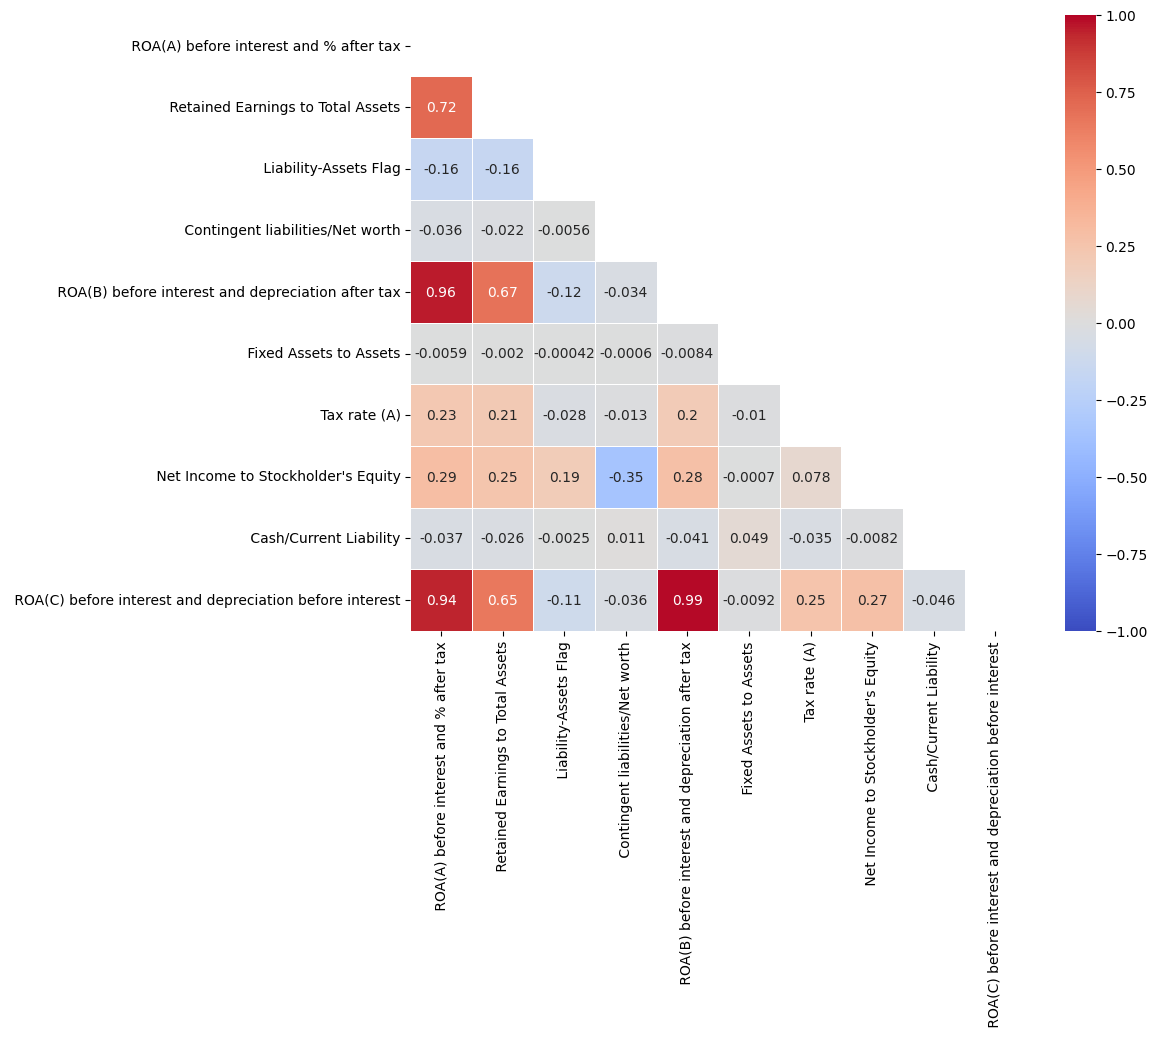

In [69]:
# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
# Set up the matplotlib figure
plt.figure(figsize=(10, 8))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', vmax=1, vmin=-1, center=0, square=True, linewidths=.5)
# Show the plot
plt.show()


## High correlation between After-Tax and Before-Tax interest rate is expected because 
The after-tax interest rate is calculated as: $After\_Tax\_Interest\_Rate = Before\_Tax\_Interest \cdot (1 - Tax\_Rate)$

## High correlation between Borrowing Dependency and Current Liability to Equity
This also makes sense because the debt is considered as Liability and if u have more debt you have to pay back the debt within a year i.e increase of current Liability.

## Net Income to StockHolder's Equity is inversely proportional to Borrowing Dependency and CL/Equity
This relationship means the Net Income which is nothing but Assets - Liabilities in balance sheet or Revenue-COGS-Operating Costs-Interest-Taxes(Basically all the obligations of a company)/Shareholder's Equity(This is nothing but Equity which the Company carried with it from initial to current stage) will increase when The residual profit will increase(increase of profit margin) which will also make the Company reinvest or pay dividends to its shareholders or buy back stocks, This in short means a good healthy company.
if that is the case then the company is not in debt and even if it is, it has the capability to pay back the debt whereas if this quantity is very low compared to Equity which the company holds as its core, then there are high chances of it borrowing Debt more often.


# References

<a id="ref1"></a>
[1] Wang, H., & Liu, X. (2021). Undersampling bankruptcy prediction: Taiwan bankruptcy data. PloS One, 16(7), e0254030. 

<a id="ref2"></a>
[2] Chawla, N. V., Bowyer, K. W., Hall, L. O., & Kegelmeyer, W. P. (2002). SMOTE: Synthetic Minority Over-sampling technique. Journal of Artificial Intelligence Research, 16, 321–357. 

<a id="ref4"></a>
[3] Sun, C. (2023). Company Bankruptcy Prediction with Machine Learning Techniques. In Frontiers in artificial intelligence and applications. https://doi.org/10.3233/faia230838
